In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

In [2]:
data_folder = "data/"

price_files = [
    "prices_round_1_day_-2.csv",
    "prices_round_1_day_-1.csv",
    "prices_round_1_day_0.csv",
]

trade_files = [
    "trades_round_1_day_-2.csv",
    "trades_round_1_day_-1.csv",
    "trades_round_1_day_0.csv",
]

In [3]:
prices = pd.concat([
    pd.read_csv(data_folder + file, sep=';') 
    for file in price_files
])

trades = pd.concat([
    pd.read_csv(data_folder + file, sep=';')
    for file in trade_files
])

In [7]:
squid_prices = prices[prices["product"] == "SQUID_INK"]
squid_trades = trades[trades["symbol"] == "SQUID_INK"]

In [ ]:
kelp_prices = prices[prices["product"] == "KELP"]
kelp_trades = trades[trades["symbol"] == "KELP"]

(30000, 30000)

In [ ]:
squid_prices[["bid_volume_1", "bid_volume_2", "bid_volume_3"]].sum(axis=1).reset_index()

In [ ]:
kelp_prices[["bid_price_1", "bid_price_2", "bid_price_3"]].sum(axis=1).reset_index()

In [27]:
import pandas as pd
import numpy as np

# First, let's extract bids from squid_prices
bids = pd.DataFrame()
for i in range(1, 4):  # For the 3 bid levels
    temp = squid_prices[['timestamp', 'product', f'bid_price_{i}', f'bid_volume_{i}']].copy()
    temp.columns = ['timestamp', 'symbol', 'price', 'volume']
    temp['type'] = 'bid'
    bids = pd.concat([bids, temp.dropna(subset=['price', 'volume'])])

# Next, extract asks from squid_prices
asks = pd.DataFrame()
for i in range(1, 4):  # For the 3 ask levels
    temp = squid_prices[['timestamp', 'product', f'ask_price_{i}', f'ask_volume_{i}']].copy()
    temp.columns = ['timestamp', 'symbol', 'price', 'volume']
    temp['type'] = 'ask'
    asks = pd.concat([asks, temp.dropna(subset=['price', 'volume'])])

# Extract trades from squid_trades
trades = squid_trades[['timestamp', 'symbol', 'price', 'quantity']].copy()
trades.columns = ['timestamp', 'symbol', 'price', 'volume']
trades['type'] = 'trade'

# Combine all data
combined_data = pd.concat([bids, asks, trades])

# Select only the columns you want in the order you specified
result = combined_data[['timestamp', 'price', 'volume', 'type']]

# Sort by timestamp
result = result.sort_values('timestamp').reset_index(drop=True)

# Basic structure

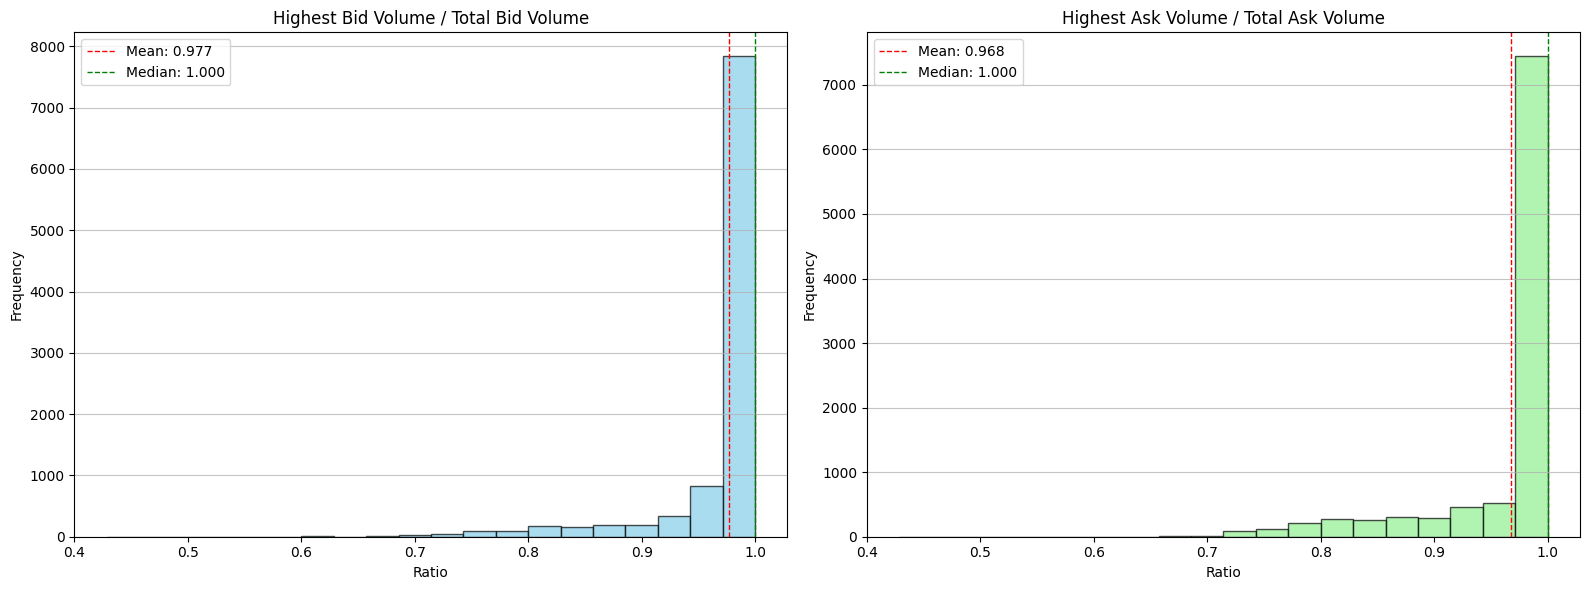

Bid Volume Ratio Statistics:
Mean: 0.977
Median: 1.000
Min: 0.429
Max: 1.000
Number of observations: 10000

Ask Volume Ratio Statistics:
Mean: 0.968
Median: 1.000
Min: 0.429
Max: 1.000
Number of observations: 10000


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate ratios for either bid or ask
def calculate_ratios(df, type_prefix):
    ratios = []
    
    # Group by timestamp
    timestamp_groups = df.groupby('timestamp')
    
    for timestamp, group in timestamp_groups:
        # Extract volumes for this timestamp
        volumes = [group[f'{type_prefix}_volume_1'].values[0], 
                   group[f'{type_prefix}_volume_2'].values[0],
                   group[f'{type_prefix}_volume_3'].values[0]]
        
        # Filter out NaN values
        volumes = [vol for vol in volumes if not pd.isna(vol)]
        
        # If there are valid volumes
        if volumes:
            highest_volume = max(volumes)
            total_volume = sum(volumes)
            
            # Avoid division by zero
            if total_volume > 0:
                ratio = highest_volume / total_volume
                ratios.append(ratio)
    
    return ratios

# Calculate ratios for both bid and ask
bid_ratios = calculate_ratios(squid_prices, 'bid')
ask_ratios = calculate_ratios(squid_prices, 'ask')

# Create subplots for bid and ask histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot bid ratio histogram
ax1.hist(bid_ratios, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Highest Bid Volume / Total Bid Volume')
ax1.set_xlabel('Ratio')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.75)
ax1.axvline(np.mean(bid_ratios), color='red', linestyle='dashed', linewidth=1, 
            label=f'Mean: {np.mean(bid_ratios):.3f}')
ax1.axvline(np.median(bid_ratios), color='green', linestyle='dashed', linewidth=1, 
            label=f'Median: {np.median(bid_ratios):.3f}')
ax1.legend()

# Plot ask ratio histogram
ax2.hist(ask_ratios, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
ax2.set_title('Highest Ask Volume / Total Ask Volume')
ax2.set_xlabel('Ratio')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', alpha=0.75)
ax2.axvline(np.mean(ask_ratios), color='red', linestyle='dashed', linewidth=1, 
            label=f'Mean: {np.mean(ask_ratios):.3f}')
ax2.axvline(np.median(ask_ratios), color='green', linestyle='dashed', linewidth=1, 
            label=f'Median: {np.median(ask_ratios):.3f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Print statistics for both
print("Bid Volume Ratio Statistics:")
print(f"Mean: {np.mean(bid_ratios):.3f}")
print(f"Median: {np.median(bid_ratios):.3f}")
print(f"Min: {min(bid_ratios):.3f}")
print(f"Max: {max(bid_ratios):.3f}")
print(f"Number of observations: {len(bid_ratios)}")

print("\nAsk Volume Ratio Statistics:")
print(f"Mean: {np.mean(ask_ratios):.3f}")
print(f"Median: {np.median(ask_ratios):.3f}")
print(f"Min: {min(ask_ratios):.3f}")
print(f"Max: {max(ask_ratios):.3f}")
print(f"Number of observations: {len(ask_ratios)}")

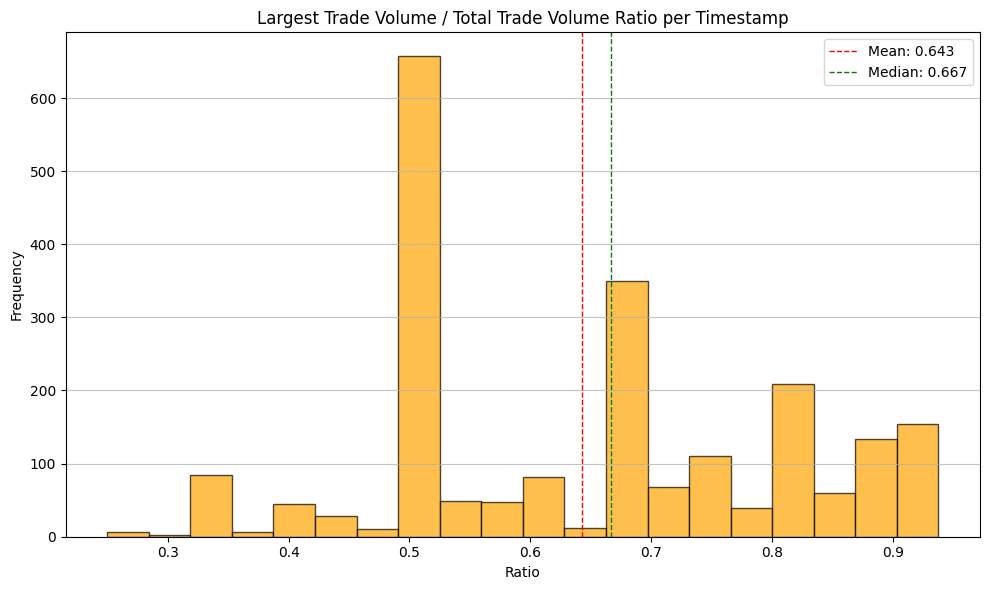

Trade Volume Ratio Statistics:
Mean: 0.643
Median: 0.667
Min: 0.250
Max: 0.938
Number of observations: 2155


In [32]:
def calculate_trade_ratios(df):
    ratios = []
    
    # Group by timestamp
    timestamp_groups = df.groupby('timestamp')
    
    for timestamp, group in timestamp_groups:
        # Only calculate ratio if there's more than one trade at this timestamp
        if len(group) > 1:
            # Get volumes (quantities) for all trades at this timestamp
            volumes = group['quantity'].values
            
            # Calculate ratio
            highest_volume = max(volumes)
            total_volume = sum(volumes)
            
            # Avoid division by zero
            if total_volume > 0:
                ratio = highest_volume / total_volume
                ratios.append(ratio)
    
    return ratios

# Calculate trade volume ratios
trade_ratios = calculate_trade_ratios(squid_trades)

# Create histogram for trade volume ratios
plt.figure(figsize=(10, 6))
plt.hist(trade_ratios, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Largest Trade Volume / Total Trade Volume Ratio per Timestamp')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(np.mean(trade_ratios), color='red', linestyle='dashed', linewidth=1, 
            label=f'Mean: {np.mean(trade_ratios):.3f}')
plt.axvline(np.median(trade_ratios), color='green', linestyle='dashed', linewidth=1, 
            label=f'Median: {np.median(trade_ratios):.3f}')
plt.legend()
plt.tight_layout()
plt.show()

# Print statistics
print("Trade Volume Ratio Statistics:")
print(f"Mean: {np.mean(trade_ratios):.3f}")
print(f"Median: {np.median(trade_ratios):.3f}")
print(f"Min: {min(trade_ratios):.3f}")
print(f"Max: {max(trade_ratios):.3f}")
print(f"Number of observations: {len(trade_ratios)}")

# Is squid related to resin?